In [1]:
import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Resources/CleanData/clean_housing.csv')

df

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size,$/SF,Zip Population,Zip SqMi,Zip Pop Density,Zip Mean HHI
0,2021-06-23,Portland,97212,2013,3,4.0,740000,2030,2613,364.53,26991,2.775,9726.486486,146186
1,2021-05-21,Portland,97212,2013,5,4.0,1200000,3557,4791,337.36,26991,2.775,9726.486486,146186
2,2021-05-21,Portland,97212,1952,4,3.0,846000,3122,6098,270.98,26991,2.775,9726.486486,146186
3,2021-05-28,Portland,97212,2015,4,4.0,1300000,3358,4791,387.14,26991,2.775,9726.486486,146186
4,2021-06-14,Portland,97212,1957,3,3.0,1300000,3912,7405,332.31,26991,2.775,9726.486486,146186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14108,2020-07-28,Portland,97231,2011,4,3.0,610000,2300,435600,265.22,2630,77.670,33.861208,161621
14109,2020-08-13,Portland,97231,1997,5,3.0,649950,3104,41817,209.39,2630,77.670,33.861208,161621
14110,2020-12-07,Portland,97231,1993,2,2.0,508000,3918,1742400,129.66,2630,77.670,33.861208,161621
14111,2021-05-26,Portland,97231,1960,5,2.0,575000,2688,77536,213.91,2630,77.670,33.861208,161621


In [3]:
X = df[['Square Feet','Zip Mean HHI']]
y = df['Sale Price']
X

,Square Feet,Zip Mean HHI
0,2030,146186
1,3557,146186
2,3122,146186
3,3358,146186
4,3912,146186
...,...,...
14108,2300,161621
14109,3104,161621
14110,3918,161621
14111,2688,161621


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

In [8]:
feature_importances = clf.feature_importances_

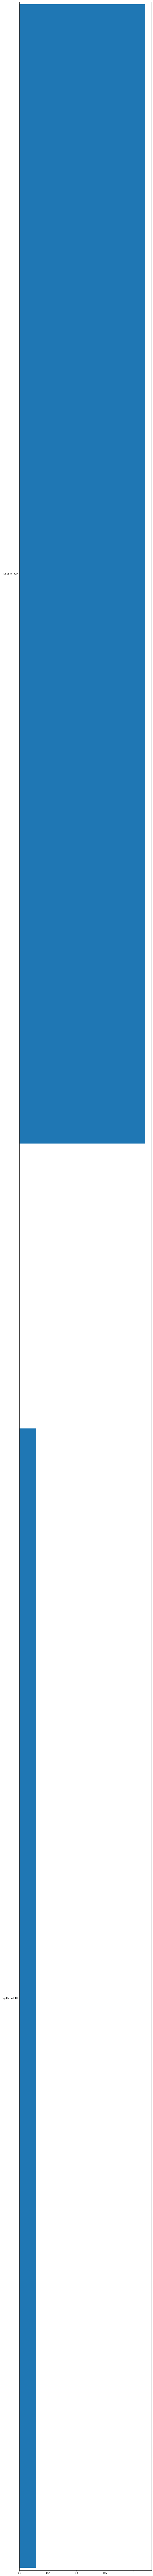

In [9]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

In [11]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

NameError: name 'sel' is not defined

In [ ]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')